In [49]:
pip install --quiet --upgrade gdsfactory

Note: you may need to restart the kernel to use updated packages.


## Parameter cell with the tag parameters

In [58]:
width = .8
width_taper = 1.42
length_taper = 10
width_mmi = 3.3
length_mmi = 7.56
gap_mmi = .5

In [59]:
# Parse string inputs
width = float(width)
width_taper = float(width_taper)
length_taper = float(length_taper)
width_mmi = float(width_mmi)
length_mmi = float(length_mmi)
gap_mmi = float(gap_mmi)

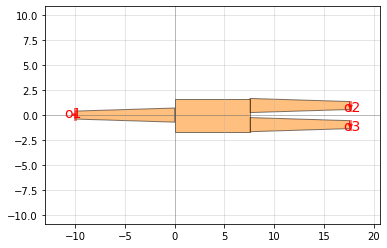

  0%|          | 0/3 [00:00<?, ?it/s]

2022-08-15 20:55:50.680 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep:write_sparameters_meep:532 - Write simulation results to PosixPath('/opt/conda/envs/silicon/lib/python3.7/site-packages/gdslib/sp/mmi1x2_150a3908_add_sim_327c1a55_231bd30a.csv')
2022-08-15 20:55:50.740 | INFO     | gdsfactory.simulation.gmeep.write_sparameters_meep:write_sparameters_meep:534 - Write simulation settings to PosixPath('/opt/conda/envs/silicon/lib/python3.7/site-packages/gdslib/sp/mmi1x2_150a3908_add_sim_327c1a55_231bd30a.yml')


Transmission at 1.55μm:  0.5034419987820133


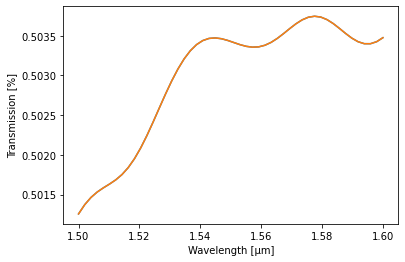

In [62]:
import numpy as np
import matplotlib.pyplot as plt

import gdsfactory
from gdsfactory.components.mmi1x2 import mmi1x2
from gdsfactory.components.bend_s import bend_s
from gdsfactory.simulation.gmeep.get_simulation import get_simulation
from gdsfactory.simulation.gmeep.write_sparameters_meep import write_sparameters_meep
from gdsfactory.simulation.gmeep.write_sparameters_meep_mpi import write_sparameters_meep_mpi
from gdsfactory.simulation.add_simulation_markers import add_simulation_markers

from gdsfactory.simulation.get_effective_indices import get_effective_indices

mmi = mmi1x2(width=width, width_taper=width_taper, length_taper=length_taper, width_mmi=width_mmi, length_mmi=length_mmi, gap_mmi=gap_mmi, cross_section='nitride')
mmi.plot()

df = write_sparameters_meep(
    add_simulation_markers(mmi), is_3d=False, animate=False, resolution=30, ymargin=0, port_margin=1.,
    material_name_to_meep={'sin': get_effective_indices(ncore=1.9963,nsubstrate=1.444,ncladding=1.444,polarization='te',wavelength=1.55,thickness=.4)[0]}
)

plt.xlabel('Wavelength [μm]')
plt.ylabel('Transmission [%]')
plt.plot(df['wavelengths'], df['s12m']**2)
plt.plot(df['wavelengths'], df['s13m']**2)

transmission_1550 = df['s12m'][np.argmin(np.abs(1.55-df['wavelengths']))] ** 2
print('Transmission at 1.55μm: ', transmission_1550)

In [27]:
import hypertune

print('reporting metric:', 'transmission_1550', transmission_1550)
hpt = hypertune.HyperTune()
hpt.report_hyperparameter_tuning_metric(
    hyperparameter_metric_tag = 'transmission_1550',
    metric_value = transmission_1550,
)

reporting metric: transmission_1550 0.7892050762965053


In [42]:
import pandas as pd
import scrapbook as sb

#df = pd.DataFrame([[param_1, param_2, product]], columns=('param_1', 'param_2', 'product'))
sb.glue('transmission_1550', transmission_1550)
sb.glue('metrics', df, 'pandas')
df

,s11a,s11m,s21a,s21m,s31a,s31m,s12a,s12m,s22a,s22m,s32a,s32m,s13a,s13m,s23a,s23m,s33a,s33m,wavelengths,freqs
0,0.680185,0.015447,-0.148336,0.417594,-0.148336,0.417594,-0.145074,0.416221,-1.203401,0.072586,-2.707496,0.079272,-0.145074,0.416221,-2.707496,0.079272,-1.203401,0.072586,1.500000,0.666667
1,-0.193441,0.015108,-0.540121,0.418384,-0.540121,0.418384,-0.537049,0.416931,-1.705848,0.077801,-3.223281,0.079296,-0.537049,0.416931,-3.223281,0.079296,-1.705848,0.077801,1.502041,0.665761
2,-0.943975,0.018901,-0.931212,0.419302,-0.931212,0.419302,-0.928190,0.417796,-2.175569,0.082202,-3.737444,0.079296,-0.928190,0.417796,-3.737444,0.079296,-2.175569,0.082202,1.504082,0.664858
3,-1.498759,0.024387,-1.321635,0.420311,-1.321635,0.420311,-1.318569,0.418806,-2.623921,0.084844,-4.250097,0.079280,-1.318569,0.418806,-4.250097,0.079280,-2.623921,0.084844,1.506122,0.663957
4,-1.942667,0.029707,-1.711401,0.421378,-1.711401,0.421378,-1.708269,0.419939,-3.062142,0.085218,-4.761369,0.079256,-1.708269,0.419939,-4.761369,0.079256,-3.062142,0.085218,1.508163,0.663058
5,-2.332541,0.033913,-2.100510,0.422470,-2.100510,0.422470,-2.097366,0.421163,-3.500951,0.083225,-5.271376,0.079231,-2.097366,0.421163,-5.271376,0.079231,-3.500951,0.083225,1.510204,0.662162
6,-2.696449,0.036504,-2.488956,0.423561,-2.488956,0.423561,-2.485915,0.422430,-3.951216,0.079165,-5.780203,0.079210,-2.485915,0.422430,-5.780203,0.079210,-3.951216,0.079165,1.512245,0.661269
7,-3.049965,0.037233,-2.876727,0.424622,-2.876727,0.424622,-2.873939,0.423684,-4.424460,0.073731,-6.287877,0.079194,-2.873939,0.423684,-6.287877,0.079194,-4.424460,0.073731,1.514286,0.660377
8,-3.404401,0.036047,-3.263805,0.425626,-3.263805,0.425626,-3.261413,0.424865,-4.931786,0.068012,-6.794372,0.079182,-3.261413,0.424865,-6.794372,0.079182,-4.931786,0.068012,1.516327,0.659489
9,-3.771609,0.033079,-3.650163,0.426546,-3.650163,0.426546,-3.648269,0.425920,-5.478835,0.063396,-7.299611,0.079171,-3.648269,0.425920,-7.299611,0.079171,-5.478835,0.063396,1.518367,0.658602
